<a href="https://colab.research.google.com/github/rajesh0305/Image-Processing-And-Computer-Vision-/blob/main/IPCV_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMAGE ENHANCEMENT USING HISTOGRAM EQUALIZATION
Using user-provided image: /content/drive/MyDrive/5flowersdata-20251210T063634Z-3-001/5flowersdata/flowers/train/Lilly/00048a5c76.jpg

Method 1: Manual Implementation
----------------------------------------
Image Dimensions: 183x275
Total Pixels: 50325


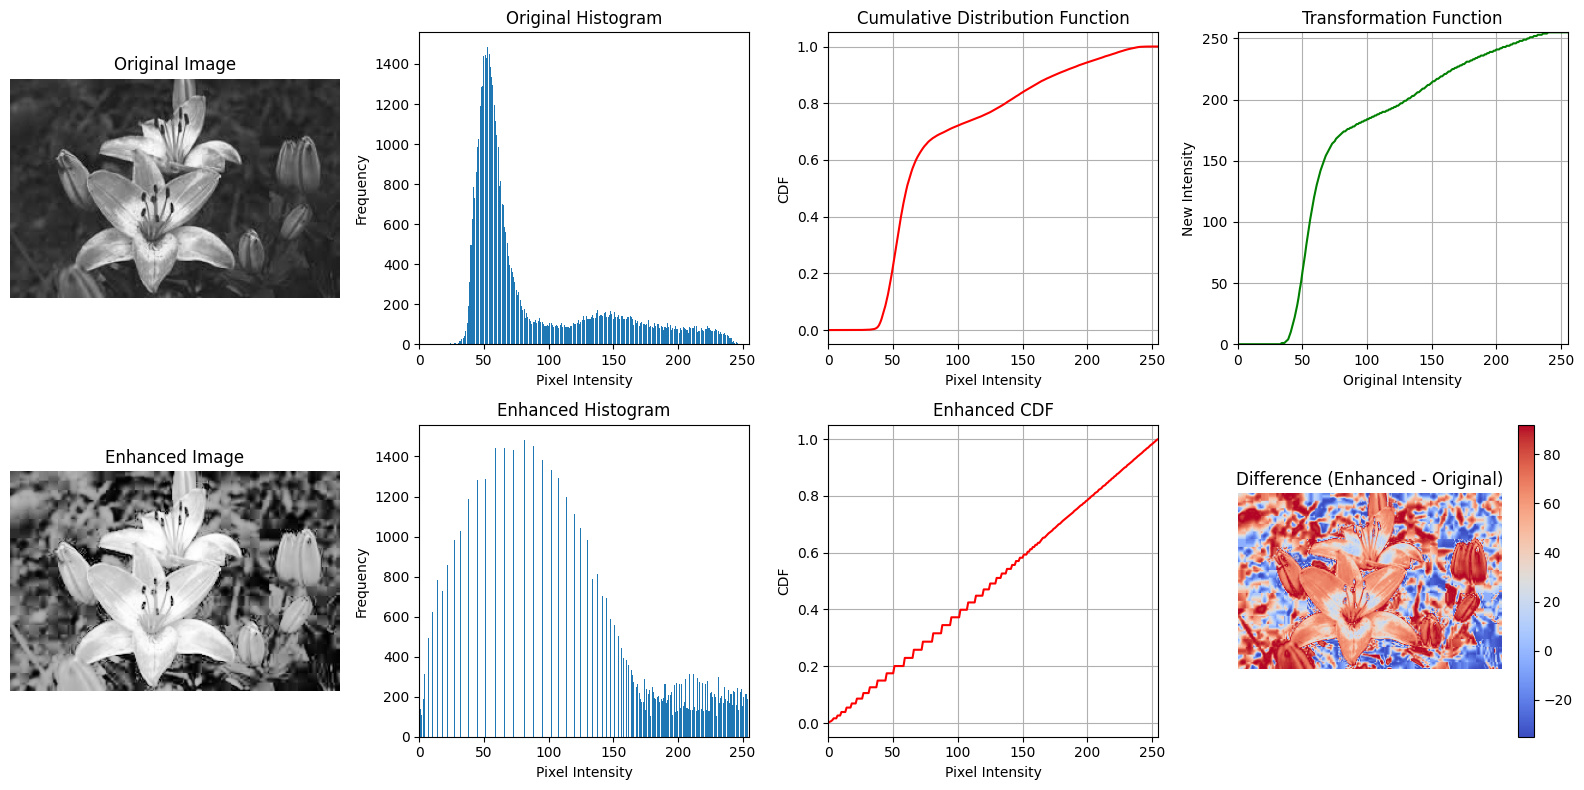


Original Image Statistics:
  Min intensity: 9
  Max intensity: 250
  Mean intensity: 87.03
  Standard deviation: 52.56

Enhanced Image Statistics:
  Min intensity: 0
  Max intensity: 255
  Mean intensity: 129.31
  Standard deviation: 72.55

Enhanced image saved as 'enhanced_image.jpg'


Method 2: Using OpenCV Built-in Function
----------------------------------------


/tmp/ipython-input-4220055420.py:144: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(enhanced_img.flatten(), 256, [0, 256])


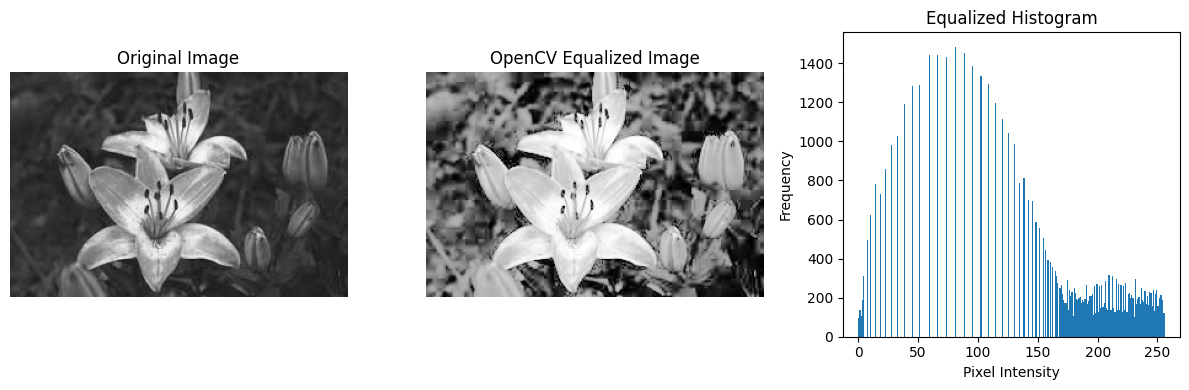


Experiment completed successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def histogram_equalization(image_path):
    """
    Perform histogram equalization on a grayscale image
    """

    # Step 1: Read the input grayscale image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return None

    # Get image dimensions
    height, width = img.shape
    total_pixels = height * width

    print(f"Image Dimensions: {height}x{width}")
    print(f"Total Pixels: {total_pixels}")

    # Step 2: Compute the histogram of the image
    hist = np.zeros(256, dtype=int)

    # Efficient way using numpy
    hist, _ = np.histogram(img.flatten(), 256, [0, 256])

    # Step 3: Normalize the histogram (probability distribution)
    hist_normalized = hist / total_pixels

    # Step 4: Compute the cumulative distribution function (CDF)
    cdf = np.cumsum(hist_normalized)

    # Step 5: Map old gray levels to new gray levels using CDF
    # s = (L-1) * CDF where L = 256 (0-255)
    L = 256
    new_values = np.zeros(256, dtype=int)

    for i in range(256):
        new_values[i] = int(round((L - 1) * cdf[i]))

    # Step 6: Create enhanced image with new values using vectorization
    enhanced_img = new_values[img]

    return img, enhanced_img, hist, cdf, new_values

def display_results(original, enhanced, hist, cdf, new_values):
    """
    Display original and enhanced images with histograms
    """
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    # Original Image
    axes[0, 0].imshow(original, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Original Histogram
    axes[0, 1].bar(range(256), hist)
    axes[0, 1].set_title('Original Histogram')
    axes[0, 1].set_xlabel('Pixel Intensity')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_xlim([0, 255])

    # Original CDF
    axes[0, 2].plot(range(256), cdf, 'r-')
    axes[0, 2].set_title('Cumulative Distribution Function')
    axes[0, 2].set_xlabel('Pixel Intensity')
    axes[0, 2].set_ylabel('CDF')
    axes[0, 2].set_xlim([0, 255])
    axes[0, 2].grid(True)

    # Transformation Function
    axes[0, 3].plot(range(256), new_values, 'g-')
    axes[0, 3].set_title('Transformation Function')
    axes[0, 3].set_xlabel('Original Intensity')
    axes[0, 3].set_ylabel('New Intensity')
    axes[0, 3].set_xlim([0, 255])
    axes[0, 3].set_ylim([0, 255])
    axes[0, 3].grid(True)

    # Enhanced Image
    axes[1, 0].imshow(enhanced, cmap='gray')
    axes[1, 0].set_title('Enhanced Image')
    axes[1, 0].axis('off')

    # Enhanced Histogram
    enhanced_hist, _ = np.histogram(enhanced.flatten(), 256, [0, 256])
    axes[1, 1].bar(range(256), enhanced_hist)
    axes[1, 1].set_title('Enhanced Histogram')
    axes[1, 1].set_xlabel('Pixel Intensity')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_xlim([0, 255])

    # Enhanced CDF
    enhanced_cdf = np.cumsum(enhanced_hist) / np.sum(enhanced_hist)
    axes[1, 2].plot(range(256), enhanced_cdf, 'r-')
    axes[1, 2].set_title('Enhanced CDF')
    axes[1, 2].set_xlabel('Pixel Intensity')
    axes[1, 2].set_ylabel('CDF')
    axes[1, 2].set_xlim([0, 255])
    axes[1, 2].grid(True)

    # Difference Image
    diff = enhanced.astype(int) - original.astype(int)
    im_diff = axes[1, 3].imshow(diff, cmap='coolwarm')
    axes[1, 3].set_title('Difference (Enhanced - Original)')
    axes[1, 3].axis('off')
    plt.colorbar(im_diff, ax=axes[1, 3])

    plt.tight_layout()
    plt.show()

def using_opencv_function(image_path):
    """
    Demonstrate using OpenCV's built-in equalizeHist function
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return None

    # Using OpenCV's built-in function
    enhanced_img = cv2.equalizeHist(img)

    # Display results
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(enhanced_img, cmap='gray')
    plt.title('OpenCV Equalized Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.hist(enhanced_img.flatten(), 256, [0, 256])
    plt.title('Equalized Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return enhanced_img

def create_sample_image():
    """
    Create a sample low-contrast image for testing
    """
    # Create a simple low-contrast gradient image
    img = np.zeros((256, 256), dtype=np.uint8)

    # Create horizontal gradient (low contrast)
    for i in range(256):
        img[i, :] = 100 + int(55 * np.sin(i * np.pi / 128))

    # Add some noise
    noise = np.random.normal(0, 10, (256, 256)).astype(np.uint8)
    img = cv2.add(img, noise)

    # Clip values to 0-255
    img = np.clip(img, 0, 255).astype(np.uint8)

    # Save the image
    cv2.imwrite('sample_low_contrast.jpg', img)
    print("Sample image created: 'sample_low_contrast.jpg'")

    return 'sample_low_contrast.jpg'

def check_image_exists(image_path):
    """
    Check if image file exists
    """
    if os.path.exists(image_path):
        return True
    else:
        print(f"Warning: Image file '{image_path}' not found.")
        return False

def main():
    """
    Main function to run histogram equalization
    """
    print("=" * 60)
    print("IMAGE ENHANCEMENT USING HISTOGRAM EQUALIZATION")
    print("=" * 60)

    image_path = None # Initialize image_path
    user_provided_path = '/content/drive/MyDrive/5flowersdata-20251210T063634Z-3-001/5flowersdata/flowers/train/Lilly/00048a5c76.jpg'

    # Prioritize user-provided path if it exists
    if check_image_exists(user_provided_path):
        image_path = user_provided_path
        print(f"Using user-provided image: {image_path}")
    else:
        # Check for command line arguments, but filter out '-f' from IPython/Jupyter
        import sys
        if len(sys.argv) > 1 and sys.argv[1] != '-f':
            image_path = sys.argv[1]
            print(f"Using image from command line: {image_path}")
        else:
            print("No valid command line image path provided. Checking default paths...")

        if image_path is None: # If not set by command line, try default paths
            possible_paths = ['input_image.jpg', 'sample_low_contrast.jpg']

            for path in possible_paths:
                if os.path.exists(path):
                    image_path = path
                    print(f"Using image: {image_path}")
                    break

        if image_path is None: # If still no image path, create a sample image
            print("No image found in default paths. Creating a sample image...")
            image_path = create_sample_image()

    print("\nMethod 1: Manual Implementation")
    print("-" * 40)

    # Manual implementation
    result = histogram_equalization(image_path)

    if result is not None:
        original, enhanced, hist, cdf, new_values = result

        # Display results
        display_results(original, enhanced, hist, cdf, new_values)

        # Calculate and print statistics
        print(f"\nOriginal Image Statistics:")
        print(f"  Min intensity: {np.min(original)}")
        print(f"  Max intensity: {np.max(original)}")
        print(f"  Mean intensity: {np.mean(original):.2f}")
        print(f"  Standard deviation: {np.std(original):.2f}")

        print(f"\nEnhanced Image Statistics:")
        print(f"  Min intensity: {np.min(enhanced)}")
        print(f"  Max intensity: {np.max(enhanced)}")
        print(f"  Mean intensity: {np.mean(enhanced):.2f}")
        print(f"  Standard deviation: {np.std(enhanced):.2f}")

        # Save the enhanced image
        cv2.imwrite('enhanced_image.jpg', enhanced)
        print(f"\nEnhanced image saved as 'enhanced_image.jpg'")
    else:
        print("Failed to process image.")
        return

    print("\n" + "=" * 60)
    print("\nMethod 2: Using OpenCV Built-in Function")
    print("-" * 40)

    # Using OpenCV built-in function
    cv2_result = using_opencv_function(image_path)

    if cv2_result is not None:
        print("\n" + "=" * 60)
        print("Experiment completed successfully!")
        print("=" * 60)
    else:
        print("Failed to process image with OpenCV.")

if __name__ == "__main__":
    # Run the main function
    main()

EXPERIMENT 3: IMAGE ENHANCEMENT USING HISTOGRAM EQUALIZATION
Aim: To enhance the contrast of a grayscale image using histogram equalization

Using user-provided image: /content/drive/MyDrive/5flowersdata-20251210T063634Z-3-001/5flowersdata/flowers/train/Lilly/00048a5c76.jpg
Using image: /content/drive/MyDrive/5flowersdata-20251210T063634Z-3-001/5flowersdata/flowers/train/Lilly/00048a5c76.jpg

IMPLEMENTING HISTOGRAM EQUALIZATION ALGORITHM
Step 1: Image loaded successfully
  Image Dimensions: 183x275
  Total Pixels: 50325
Step 2: Histogram array initialized (size 256)
Step 3: Computing histogram...
  Histogram computed successfully
Step 4: Histogram normalized
Step 5: Cumulative Distribution Function (CDF) computed
Step 6: New intensity values computed
Step 7: Pixel values replaced with new values

ALGORITHM COMPLETED SUCCESSFULLY

Displaying results...


/tmp/ipython-input-2930453842.py:83: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(original.flatten(), 256, [0, 256])
/tmp/ipython-input-2930453842.py:97: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(enhanced.flatten(), 256, [0, 256])


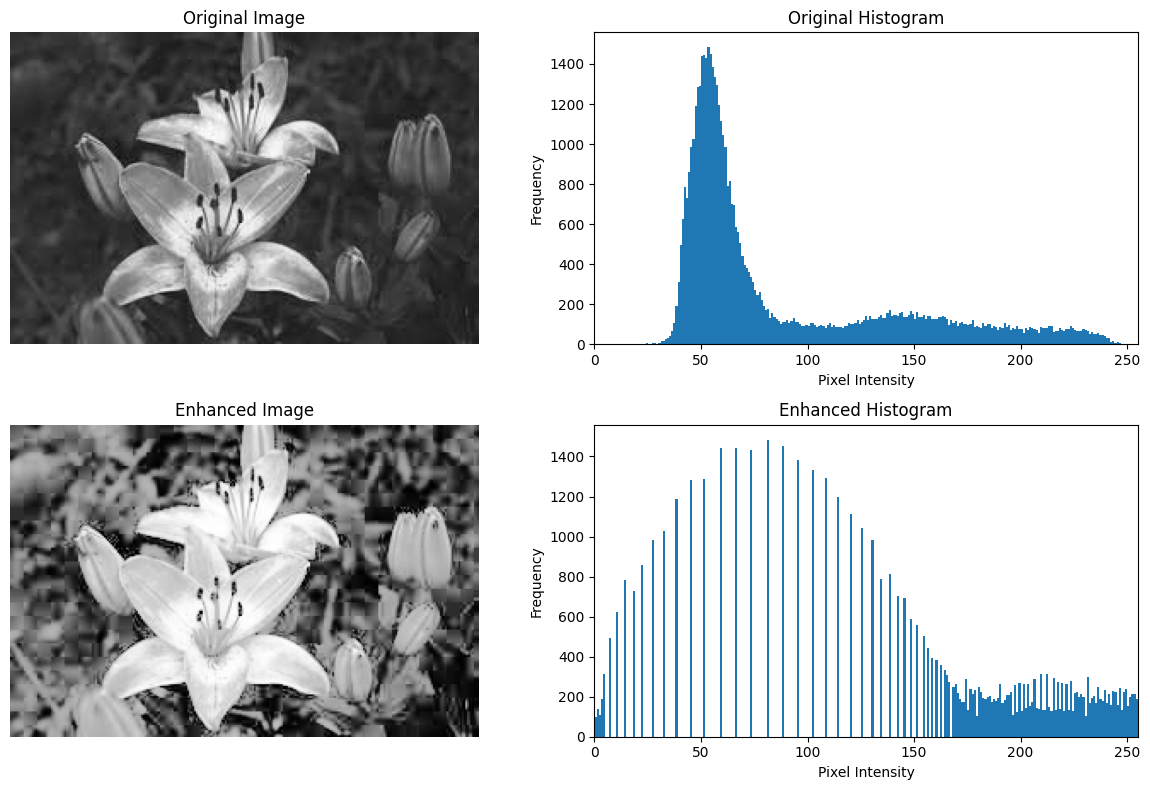


Would you like to see detailed results with CDF and transformation? (y/n): y


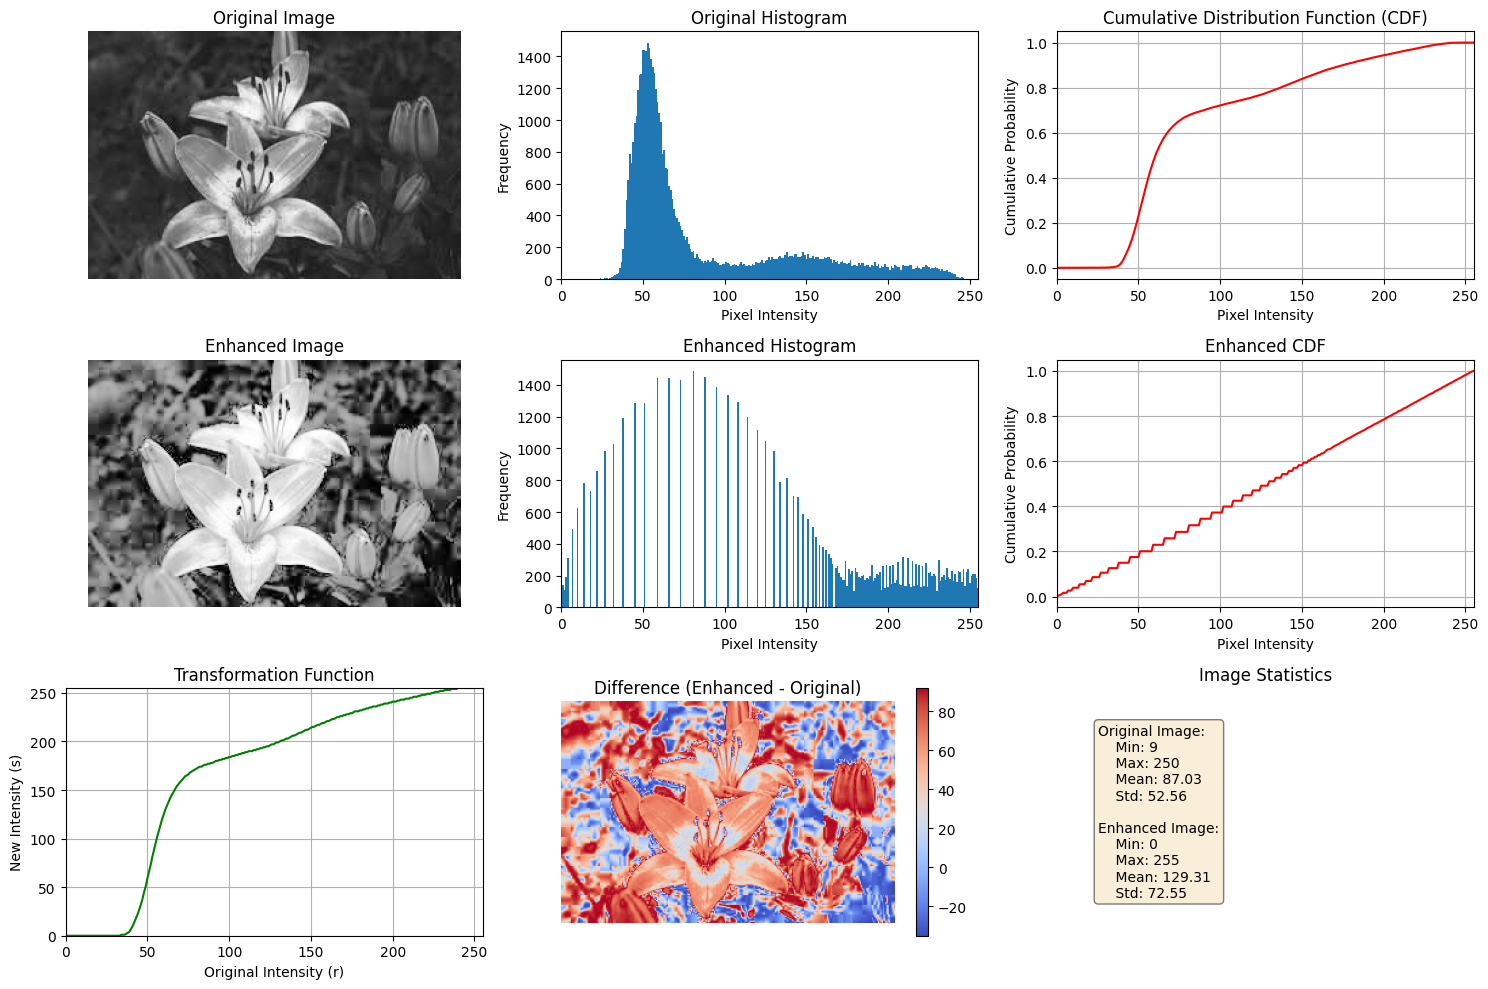


RESULT ANALYSIS

Original Image Statistics:
  Intensity Range: 9 to 250
  Range Width: 241
  Mean Intensity: 87.03
  Standard Deviation: 52.56

Enhanced Image Statistics:
  Intensity Range: 0 to 255
  Range Width: 255
  Mean Intensity: 129.31
  Standard Deviation: 72.55

EXPERIMENT COMPLETED

Files saved:
  - original_image.jpg
  - enhanced_image.jpg

Conclusion: Image successfully enhanced using histogram equalization.
The contrast has been improved by redistributing pixel intensities.


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def histogram_equalization_exact(image_path):
    """
    Perform histogram equalization following the exact pseudo code from the lab manual
    """

    # Step 1: Read the grayscale image into a variable img
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return None

    # Get image dimensions
    height, width = img.shape
    total_pixels = height * width

    print("Step 1: Image loaded successfully")
    print(f"  Image Dimensions: {height}x{width}")
    print(f"  Total Pixels: {total_pixels}")

    # Step 2: Initialize an array hist with zeros of size 256
    hist = np.zeros(256, dtype=int)
    print("Step 2: Histogram array initialized (size 256)")

    # Step 3: for each pixel value p in img: Increment hist[p] by 1
    print("Step 3: Computing histogram...")
    for i in range(height):
        for j in range(width):
            p = img[i, j]
            hist[p] += 1

    print("  Histogram computed successfully")

    # Step 4: Normalize hist by dividing each value by total number of pixels
    hist_normalized = hist.astype(float) / total_pixels
    print("Step 4: Histogram normalized")

    # Step 5: Compute cumulative sum of hist to obtain cdf
    cdf = np.zeros(256, dtype=float)
    cdf[0] = hist_normalized[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + hist_normalized[i]

    print("Step 5: Cumulative Distribution Function (CDF) computed")

    # Step 6: for each gray level i from 0 to 255: new_value[i] = round(255 * cdf[i])
    new_value = np.zeros(256, dtype=int)
    for i in range(256):
        new_value[i] = int(round(255 * cdf[i]))

    print("Step 6: New intensity values computed")

    # Step 7: for each pixel p in img: Replace p with new_value[p]
    enhanced_img = img.copy()  # Create a copy to preserve original
    for i in range(height):
        for j in range(width):
            p = enhanced_img[i, j]
            enhanced_img[i, j] = new_value[p]

    print("Step 7: Pixel values replaced with new values")

    return img, enhanced_img, hist, cdf, new_value

def display_results_simple(original, enhanced):
    """
    Simple display of results as per lab requirements
    """
    plt.figure(figsize=(12, 8))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Original Histogram
    plt.subplot(2, 2, 2)
    plt.hist(original.flatten(), 256, [0, 256])
    plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

    # Enhanced Image
    plt.subplot(2, 2, 3)
    plt.imshow(enhanced, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')

    # Enhanced Histogram
    plt.subplot(2, 2, 4)
    plt.hist(enhanced.flatten(), 256, [0, 256])
    plt.title('Enhanced Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

    plt.tight_layout()
    plt.show()

def display_detailed_results(original, enhanced, hist, cdf, new_value):
    """
    Detailed display including transformation function and CDF
    """
    plt.figure(figsize=(15, 10))

    # Original Image
    plt.subplot(3, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Original Histogram
    plt.subplot(3, 3, 2)
    plt.bar(range(256), hist, width=1.0)
    plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

    # CDF
    plt.subplot(3, 3, 3)
    plt.plot(range(256), cdf, 'r-')
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Cumulative Probability')
    plt.xlim([0, 255])
    plt.grid(True)

    # Enhanced Image
    plt.subplot(3, 3, 4)
    plt.imshow(enhanced, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')

    # Enhanced Histogram
    enhanced_hist, _ = np.histogram(enhanced.flatten(), 256, [0, 256])
    plt.subplot(3, 3, 5)
    plt.bar(range(256), enhanced_hist, width=1.0)
    plt.title('Enhanced Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

    # Enhanced CDF
    enhanced_cdf = np.cumsum(enhanced_hist) / np.sum(enhanced_hist)
    plt.subplot(3, 3, 6)
    plt.plot(range(256), enhanced_cdf, 'r-')
    plt.title('Enhanced CDF')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Cumulative Probability')
    plt.xlim([0, 255])
    plt.grid(True)

    # Transformation Function
    plt.subplot(3, 3, 7)
    plt.plot(range(256), new_value, 'g-')
    plt.title('Transformation Function')
    plt.xlabel('Original Intensity (r)')
    plt.ylabel('New Intensity (s)')
    plt.xlim([0, 255])
    plt.ylim([0, 255])
    plt.grid(True)

    # Difference Image
    plt.subplot(3, 3, 8)
    diff = enhanced.astype(int) - original.astype(int)
    plt.imshow(diff, cmap='coolwarm')
    plt.title('Difference (Enhanced - Original)')
    plt.axis('off')
    plt.colorbar()

    # Image Statistics
    plt.subplot(3, 3, 9)
    plt.axis('off')
    stats_text = f"""Original Image:
    Min: {np.min(original)}
    Max: {np.max(original)}
    Mean: {np.mean(original):.2f}
    Std: {np.std(original):.2f}

Enhanced Image:
    Min: {np.min(enhanced)}
    Max: {np.max(enhanced)}
    Mean: {np.mean(enhanced):.2f}
    Std: {np.std(enhanced):.2f}"""

    plt.text(0.1, 0.5, stats_text, fontsize=10,
             verticalalignment='center',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.title('Image Statistics')

    plt.tight_layout()
    plt.show()

def create_test_image():
    """
    Create a test image with narrow intensity range as mentioned in the example
    """
    print("Creating a test image with narrow intensity range...")

    # Create an image with pixel values concentrated between 50 and 150
    height, width = 256, 256
    img = np.zeros((height, width), dtype=np.uint8)

    # Generate a gradient with limited range
    for i in range(height):
        for j in range(width):
            # Create values mostly between 50 and 150
            base_value = 100
            variation = 50 * np.sin(i * np.pi / 128) * np.cos(j * np.pi / 128)
            pixel_value = int(base_value + variation)
            img[i, j] = np.clip(pixel_value, 50, 150)

    # Add some random variations
    noise = np.random.normal(0, 10, (height, width))
    img = img.astype(int) + noise.astype(int)
    img = np.clip(img, 50, 150).astype(np.uint8)

    cv2.imwrite('test_narrow_range.jpg', img)
    print("Test image created: 'test_narrow_range.jpg'")
    print(f"Image intensity range: {np.min(img)} to {np.max(img)}")

    return 'test_narrow_range.jpg'

def check_image_exists(image_path):
    """
    Check if image file exists
    """
    if os.path.exists(image_path):
        return True
    else:
        print(f"Warning: Image file '{image_path}' not found.")
        return False

def main():
    """
    Main function to run histogram equalization as per lab manual
    """
    print("=" * 60)
    print("EXPERIMENT 3: IMAGE ENHANCEMENT USING HISTOGRAM EQUALIZATION")
    print("=" * 60)
    print("Aim: To enhance the contrast of a grayscale image using histogram equalization\n")

    image_path = None # Initialize image_path
    user_provided_path = '/content/drive/MyDrive/5flowersdata-20251210T063634Z-3-001/5flowersdata/flowers/train/Lilly/00048a5c76.jpg'

    # Prioritize user-provided path if it exists
    if check_image_exists(user_provided_path):
        image_path = user_provided_path
        print(f"Using user-provided image: {image_path}")
    else:
        # Check for command line arguments, but filter out '-f' from IPython/Jupyter
        import sys
        if len(sys.argv) > 1 and sys.argv[1] != '-f':
            image_path = sys.argv[1]
            print(f"Using image from command line: {image_path}")
        else:
            print("No valid command line image path provided. Checking default paths...")

        if image_path is None: # If not set by command line, try default paths
            possible_files = ['input_image.jpg', 'test_narrow_range.jpg', 'sample.jpg', 'image.jpg']

            for file in possible_files:
                if os.path.exists(file):
                    image_path = file
                    print(f"Using image: {image_path}")
                    break

        if image_path is None: # If still no image path, create a sample image
            print("No image file found. Creating a test image...")
            image_path = create_test_image()

    print(f"Using image: {image_path}")

    # Perform histogram equalization (following exact pseudo code)
    print("\n" + "=" * 60)
    print("IMPLEMENTING HISTOGRAM EQUALIZATION ALGORITHM")
    print("=" * 60)

    result = histogram_equalization_exact(image_path)

    if result is None:
        print("Failed to process image.")
        return

    original, enhanced, hist, cdf, new_value = result

    print("\n" + "=" * 60)
    print("ALGORITHM COMPLETED SUCCESSFULLY")
    print("=" * 60)

    # Display results
    print("\nDisplaying results...")

    # Simple display (as per lab requirements)
    display_results_simple(original, enhanced)

    # Ask if user wants detailed view
    response = input("\nWould you like to see detailed results with CDF and transformation? (y/n): ")
    if response.lower() == 'y':
        display_detailed_results(original, enhanced, hist, cdf, new_value)

    # Print statistics
    print("\n" + "=" * 60)
    print("RESULT ANALYSIS")
    print("=" * 60)

    print("\nOriginal Image Statistics:")
    print(f"  Intensity Range: {np.min(original)} to {np.max(original)}")
    print(f"  Range Width: {np.max(original) - np.min(original)}")
    print(f"  Mean Intensity: {np.mean(original):.2f}")
    print(f"  Standard Deviation: {np.std(original):.2f}")

    print("\nEnhanced Image Statistics:")
    print(f"  Intensity Range: {np.min(enhanced)} to {np.max(enhanced)}")
    print(f"  Range Width: {np.max(enhanced) - np.min(enhanced)}")
    print(f"  Mean Intensity: {np.mean(enhanced):.2f}")
    print(f"  Standard Deviation: {np.std(enhanced):.2f}")

    # Save results
    cv2.imwrite('original_image.jpg', original)
    cv2.imwrite('enhanced_image.jpg', enhanced)

    print("\n" + "=" * 60)
    print("EXPERIMENT COMPLETED")
    print("=" * 60)
    print("\nFiles saved:")
    print("  - original_image.jpg")
    print("  - enhanced_image.jpg")
    print("\nConclusion: Image successfully enhanced using histogram equalization.")
    print("The contrast has been improved by redistributing pixel intensities.")

if __name__ == "__main__":
    main()